In [1]:
# Your code here


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
import missingno as msno
from sklearn.impute import KNNImputer




In [2]:
ds = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv').iloc[:,1:]
ds.to_csv('/workspaces/machine-learning-python-template/data/raw/machinelearning.csv', index=False)# he descargado y guardado el csv
ds.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
ds.shape 

(48895, 15)

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               

In [5]:
ds.nunique()

name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [6]:
print(ds.duplicated().sum())#comprobación de duplicados 

0


In [7]:
ds.drop(columns= ['name', 'host_id', 'host_name'], inplace= True) #Eliminamos columnas inecesarias 

In [8]:
ds.isnull().any(axis=0)

neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [9]:
ds['has_review'] = (ds['number_of_reviews'] > 0).astype(int) #Explicación del código:ds['number_of_reviews'] > 0: Esto crea una serie booleana donde cada valor es True si number_of_reviews es mayor que 0, y False si es 0..astype(int): Convierte los valores booleanos a enteros. True se convierte en 1 y False se convierte en 0.El resultado se asigna a una nueva columna llamada 'has_review'.

In [10]:
ds.head()


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,has_review
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1


In [11]:
ds.isnull().mean()*100 # Incidencia de los valores perdidos en cada una de las variables

neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
has_review                         0.000000
dtype: float64

In [12]:
print(ds.columns)

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'has_review'],
      dtype='object')


In [13]:

ds.isnull().any(axis=1).sum()/len(ds)*100

np.float64(20.55833929849678)

<Axes: >

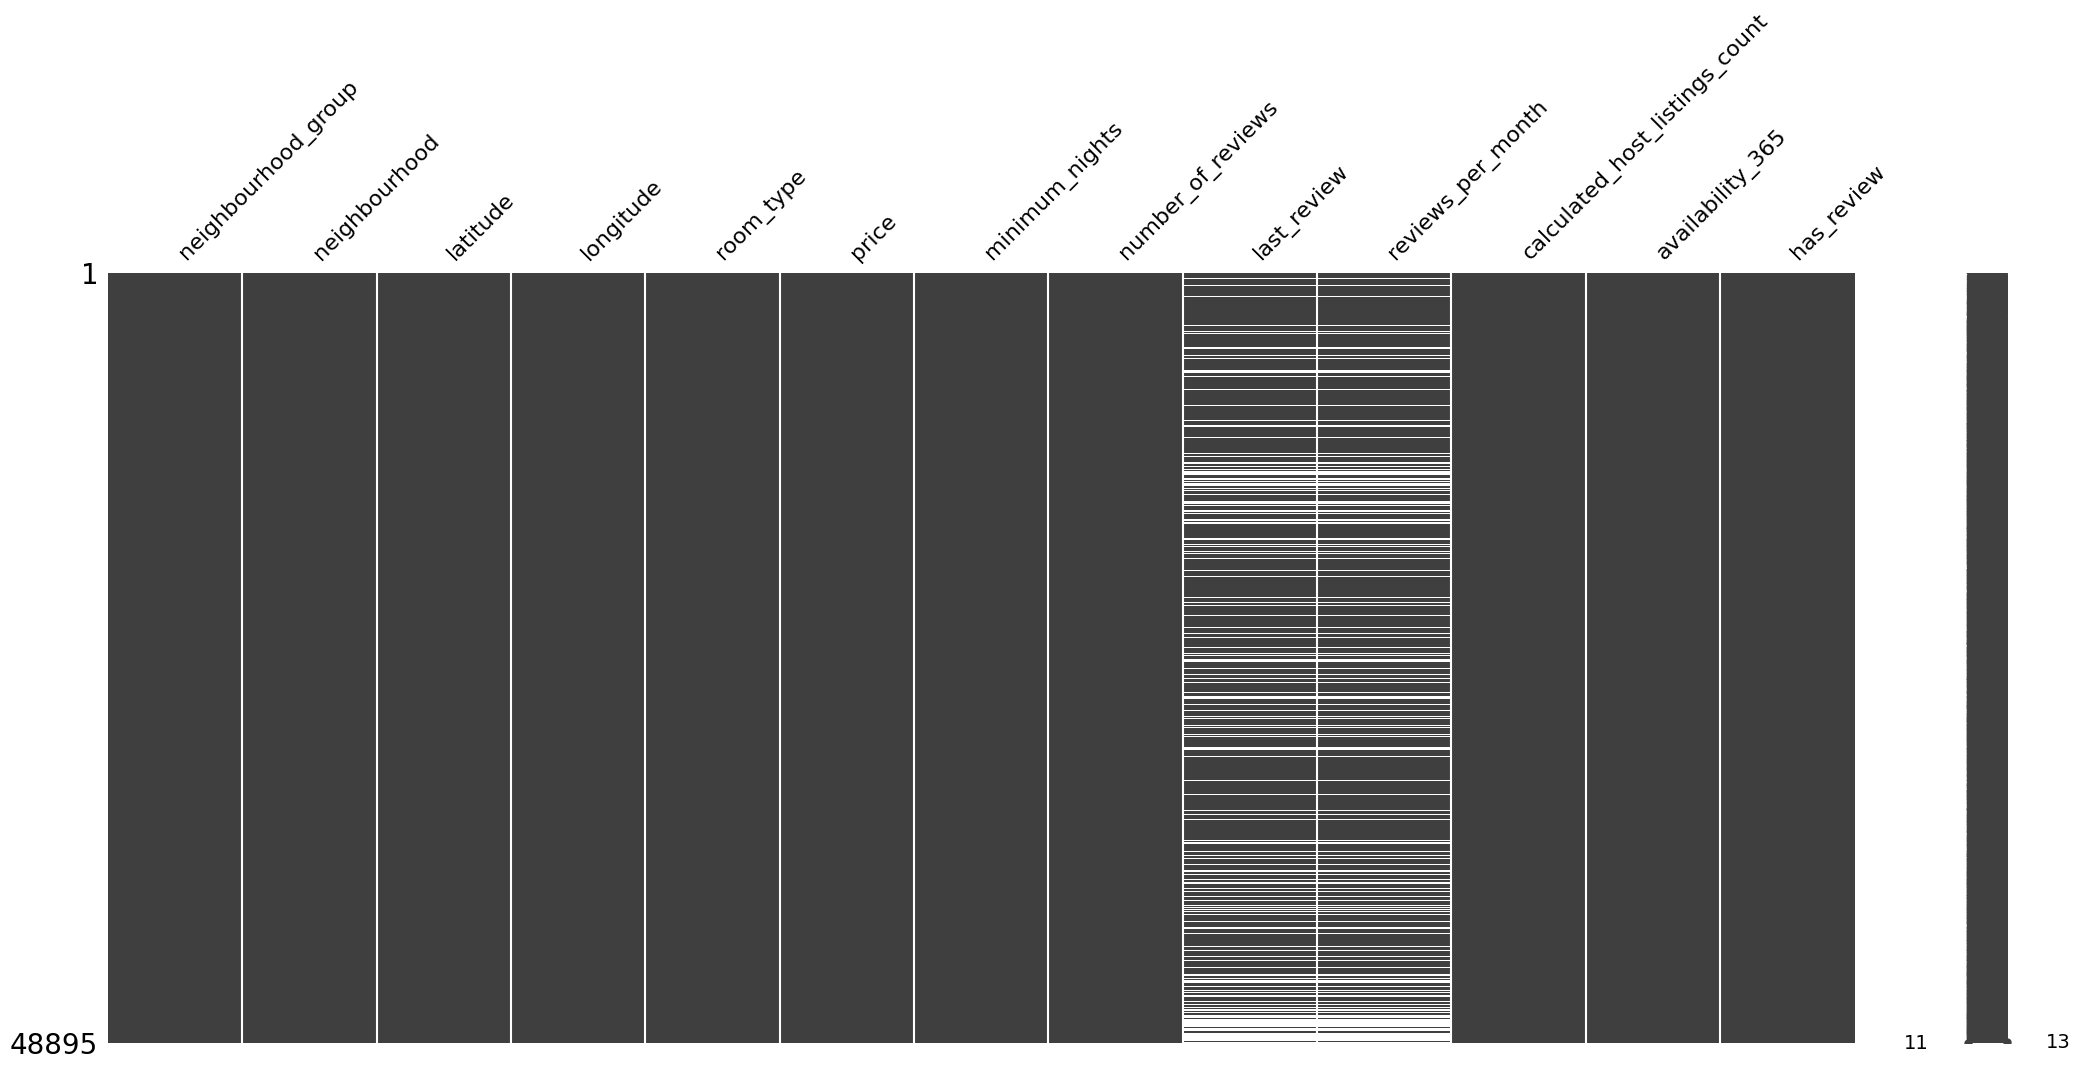

In [14]:
msno.matrix(ds)

In [15]:
ds.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.729,0.055,40.500,40.690,40.723,40.763,40.913
longitude,48895.0,-73.952,0.046,-74.244,-73.983,-73.956,-73.936,-73.713
price,48895.0,152.721,240.154,0.000,69.000,106.000,175.000,10000.000
minimum_nights,48895.0,7.030,20.511,1.000,1.000,3.000,5.000,1250.000
number_of_reviews,48895.0,23.274,44.551,0.000,1.000,5.000,24.000,629.000
reviews_per_month,38843.0,1.373,1.680,0.010,0.190,0.720,2.020,58.500
calculated_host_listings_count,48895.0,7.144,32.953,1.000,1.000,1.000,2.000,327.000
availability_365,48895.0,112.781,131.622,0.000,0.000,45.000,227.000,365.000
has_review,48895.0,0.794,0.404,0.000,1.000,1.000,1.000,1.000


NameError: name 'df' is not defined

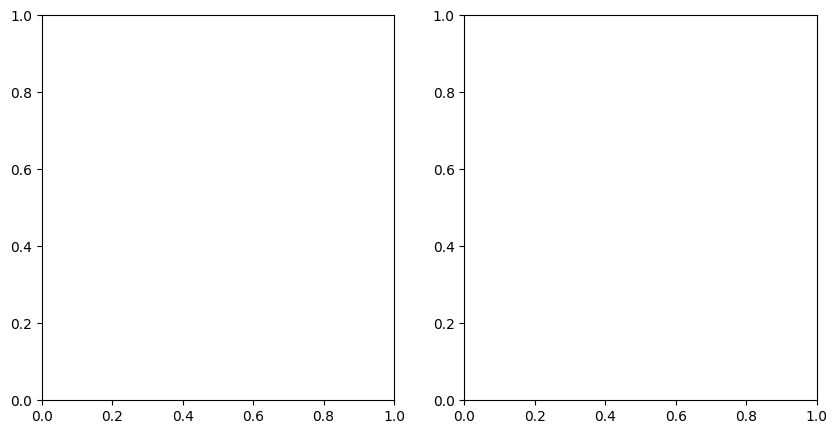

In [16]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['PRICE'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de PRICE')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['PRICE'], vert=False)
ax[1].set_title('Boxplot de PRICE')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [ ]:
imputador_knn = KNNImputer(n_neighbors=3)
ds[['reviews_per_month']] = imputador_knn.fit_transform(df[['reviews_per_month']])